In [3]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 3: Visualization
## Due Date: Monday, October 21st, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

## Introduction

Atmospheric loading of radiative ("greenhouse") gases, such as Carbon Dioxide and Methane, is having an increasingly apparent effect on global climate. One of the more straightforward consequences of this process is an increase in average temperatures. With few exceptions, this effect can be detected wherever you look at temperatures through time. However, there are other potential consequences of climate change as well, such as shift in patterns of rainfall. Unlike temperature, how rainfall will change with time is more challenging to predict, and might be more variable from one place to another. 

*NOTE*: You can make all plots using any combination of `matplotlib` and `seaborn`. **You will need to refer to each package's respective documentation (e.g. [seaborn](https://seaborn.pydata.org/index.html)) for this homework**. For example, the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) for `regplot` will have some useful examples that can help you on question 2. This is a common practice that should become familiar to you; there are many types of plots and many ways to alter their aesthetics, and learning how to figure these things out from the documentation is an essential skill.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ap_temp = pd.read_csv("ap_temp.csv")
ap_temp.tail()

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX
126,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAX


#### Question 1

Create a scatterplot of Temperature (y; units are in C; column 'T' in the data) as a function of Year (x) at **PDX only**. Ensure that the plot (and all plots for this HW) are properly labeled with a title and axis labels with units if relevant.

Text(0.5, 1.0, 'Temperature vs Year at PDX')

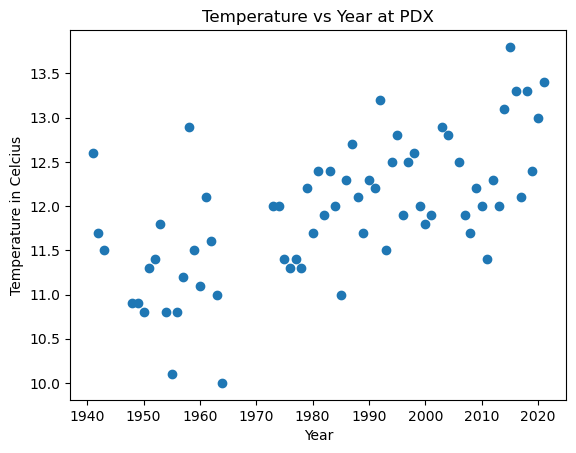

In [6]:
only_pdx = ap_temp[ap_temp["Airport"] == "PDX"]
plt.scatter(only_pdx["Year"], only_pdx["T"])
plt.xlabel("Year")
plt.ylabel("Temperature in Celcius")
plt.title("Temperature vs Year at PDX")

#### Question 2

The trend should generally appear positive *i.e.* that temperature is increasing with time at PDX. Because the relationship appears roughly linear, we could fit a simple linear model to better visualize that trend. 

Rather than find the model ourselves by solving for its parameters, using 'scikit-learn', or 'using statsmodel', use seaborn's `regplot` to visualize the relationship and plot a regression line automatically. Change the colors of the regression line and the points to anything you want, but make them different.

Text(0, 0.5, 'Temperate in Celcius')

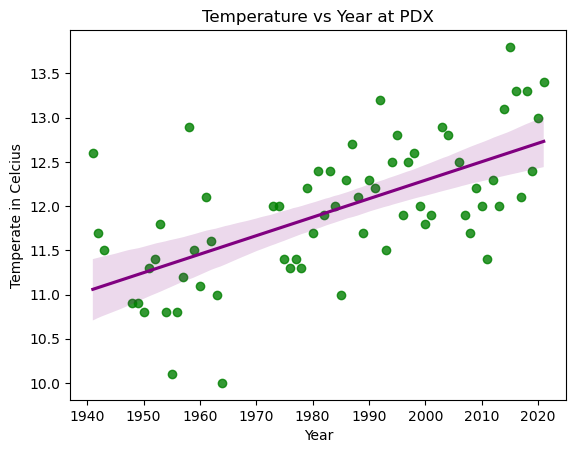

In [7]:
sns.regplot(data = only_pdx, x = "Year", y = "T", scatter=True, color="green",
            line_kws={"color": "purple"})
plt.title("Temperature vs Year at PDX")
plt.xlabel("Year")
plt.ylabel("Temperate in Celcius")

#### Question 3

In addition to temperature, climate change is also thought to be influencing patterns of precipitation. Specifically, some places might get drier and some places might get wetter. 

First, create a new variable called 'recent' in the full data indicating whether the record was before 1985 (inclusive) or after 1985. 

In [8]:
ap_temp["recent"] = np.where(ap_temp["Year"] <= 1985, "Before 1985", "After 1985")
ap_temp

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport,recent
0,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Before 1985
1,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Before 1985
2,1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Before 1985
3,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Before 1985
4,1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Before 1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX,After 1985
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX,After 1985
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX,After 1985
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX,After 1985


In [9]:
grader.check("q3")

q3 results: All test cases passed!

#### Question 4

Looking only at PDX, create two plots: a barplot of average annual temperatures before 1985 and after 1985; a boxplot of annual temperatures before 1985 and after 1985.

In [10]:
# Data Filtering
pdx_only = ap_temp.query('Airport == "PDX"')
mean_temps = pdx_only.groupby("recent")["T"].mean()
mean_temps = mean_temps.reindex(["Before 1985", "After 1985"])

Text(0, 0.5, 'Temperature in Celcius')

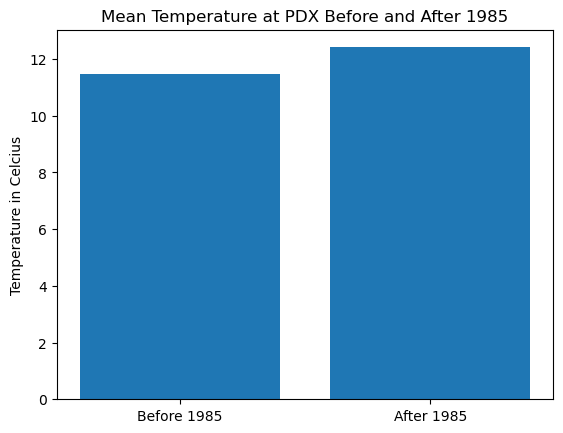

In [11]:
# Your barplot
plt.bar(mean_temps.index, mean_temps.values)
plt.title("Mean Temperature at PDX Before and After 1985")
plt.ylabel("Temperature in Celcius")

Text(0, 0.5, 'Temperature')

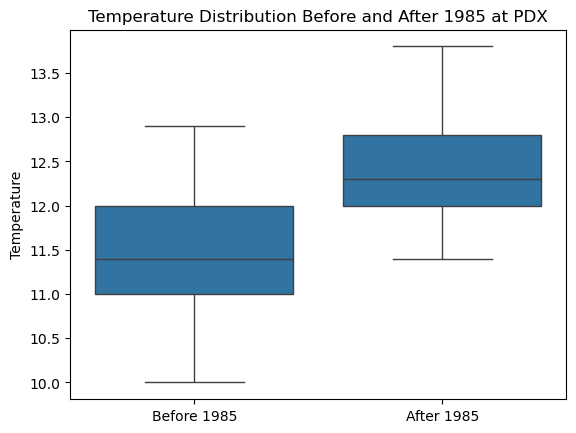

In [12]:
# Your boxplot
sns.boxplot(data=pdx_only, x="recent", y="T")
plt.title("Temperature Distribution Before and After 1985 at PDX")
plt.xlabel(None)
plt.ylabel("Temperature")

#### Question 5

Which of these plots do you think better represents the relationship of interest? Why?

**Your response:** I think the boxplot does a better job of representing the relationship between temperatures before and after 1985 in regards to investigating climate change. The boxplot represents not only the average temperatures between the two groups, but also the low and high ends of the temperature distribution. This provides a better representation of how the temperature distribution as a whole has increased (rather than just the mean) giving us a more well rounded view of climate change.

#### Question 6

Replot either the barplot or the boxplot but orient the plot horizontally instead of vertically. Check the functions documentation to determine how to do this. 

Text(0, 0.5, 'Temperature in Celcius')

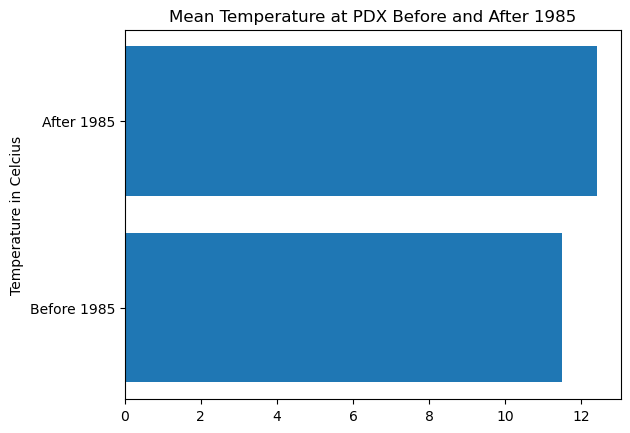

In [13]:
plt.barh(mean_temps.index, mean_temps.values, )
plt.title("Mean Temperature at PDX Before and After 1985")
plt.ylabel("Temperature in Celcius")

#### Question 7

Now create a single, grouped/paired boxplot (vertical or horizontal) showing the temperature at both PDX and LAX in both time periods. There should be 4 total boxes, and the boxplots should be grouped by airport.

Text(0, 0.5, 'Temperature')

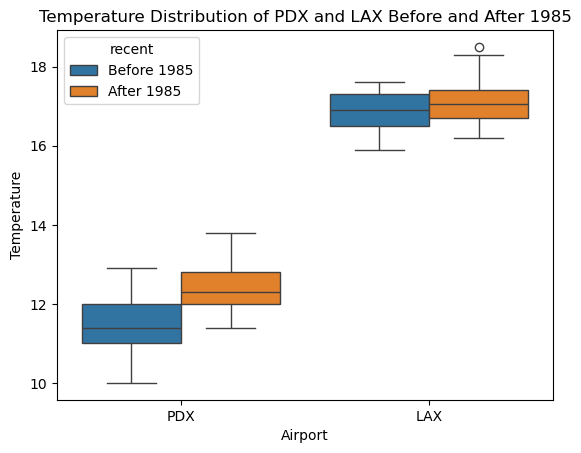

In [14]:
sns.boxplot(data=ap_temp, x="Airport", y="T", hue="recent")
plt.title("Temperature Distribution of PDX and LAX Before and After 1985")
plt.ylabel("Temperature")

#### Question 8

Create a single `relplot` showing temperature `T` by year for both airports. Change the color of points based on their associated airports, and adjust the size of each point based on precipitation `PP`. Use a different color palette than the default one. 

Text(41.126430555555544, 0.5, 'Temperature')

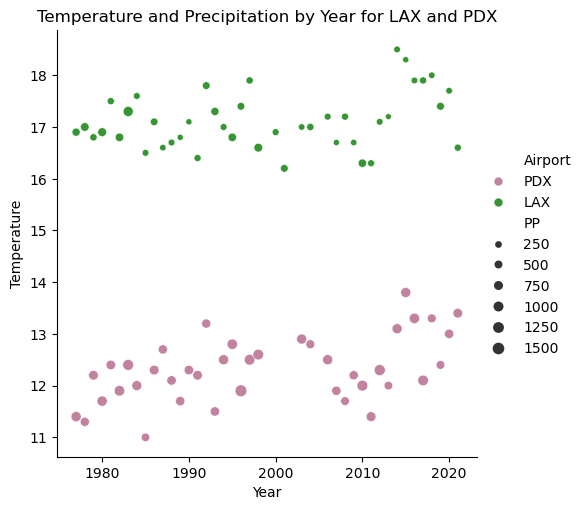

In [15]:
sns.relplot(data=ap_temp, x="Year", y="T", hue="Airport", size="PP",
            palette=["#C1839F", "#379634"])
plt.title("Temperature and Precipitation by Year for LAX and PDX")
plt.ylabel("Temperature")

#### Question 9.1

Now, create two plots, one for PDX (Portland) and one for LAX (Los Angeles). 

Each plot should show the **bivariate distributions of temperature (T) and precipitation (PP) for each time group** (before and after 1985) on the same plot. Check out Seaborn's [page on visualizing distributions](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to do this. 

Additionally, each plot should have **two points representing the averages of T and PP for each time group**. These will therefore represent the averages of each bivariate distribution. Ensure that the distributions and associated points **are different colors depending on whether they are from before or after 1985**. 

Text(8.765041666666663, 0.5, 'Precipitation')

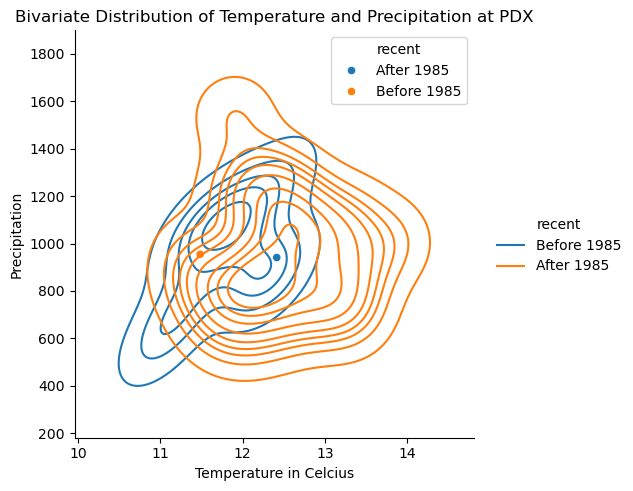

In [32]:
# PDX bivariate plot
sns.displot(data=pdx_only, x="T", y="PP", hue="recent", col="Airport", kind="kde")
pdx_means = pdx_only.groupby("recent")[["T", "PP"]].mean()
sns.scatterplot(data=pdx_means, x="T", y="PP", hue="recent")

plt.title("Bivariate Distribution of Temperature and Precipitation at PDX")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Precipitation")

Text(6.015041666666663, 0.5, 'Precipitation')

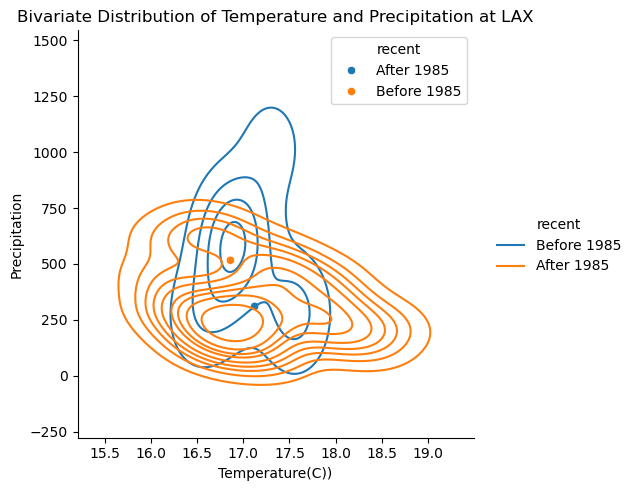

In [33]:
# LAX bivariate plot
lax_only = ap_temp.query('Airport == "LAX"')
sns.displot(data=lax_only, x="T", y="PP", hue="recent", col="Airport", kind="kde")
lax_means = lax_only.groupby("recent")[["T", "PP"]].mean()
sns.scatterplot(data=lax_means, x="T", y="PP", hue="recent")

plt.title("Bivariate Distribution of Temperature and Precipitation at LAX")
plt.xlabel("Temperature(C))")
plt.ylabel("Precipitation")

#### Question 9.2

Looking at the bivariate distributions of climate at PDX and their centers, how would you say climate has changed at PDX from before 1985 to after 1985?

If you're unsure how to interpret the bivariate distributions, consider using scatterplots to help answer the question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [38]:
ans_92 = 2

In [39]:
grader.check("q9_2")

q9_2 results: All test cases passed!

#### Question 9.3

Looking at the bivariate distributions of climate at LAX and their centers, how would you say climate has changed at LAX from before 1985 to after 1985?

Only select one answer, but there are two acceptable answers for this question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [40]:
ans_93 = 4

In [41]:
grader.check("q9_3")

q9_3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then upload your .ipynb file to Canvas assignment HW3